<a href="https://colab.research.google.com/github/fay421/DL_Projects/blob/main/VGG16%20by%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VGG16 by PyTorch

## Import Libraries

In [29]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import torch
from torchvision.models import vgg16
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image

## Create Model

In [16]:
pytorch_model= vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Load Image

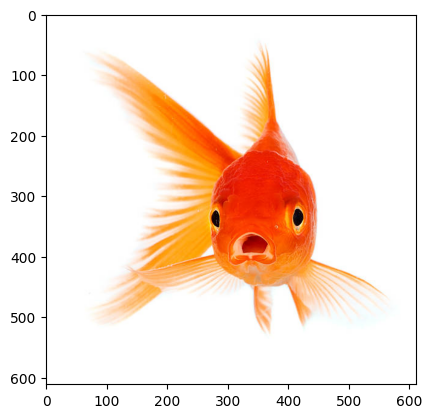

In [18]:
path_img='/content/Goldfish.jpg'
img=load_img(path_img)
plt.imshow(img);

## Freeze Dropout & BatchNormalization

## Evaluate Model

In [19]:
pytorch_model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Preprocessing Phases

In [20]:
process_transform = transforms.Compose([transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]),
                                        ])

## Show Image by PIL

In [31]:
path_img='/content/Goldfish.jpg'
img = Image.open(path_img)

In [33]:
proc_image=process_transform(img)

## Convert to array

In [36]:
torch_img = torch.unsqueeze(proc_image,0)

In [37]:
torch_img.shape

torch.Size([1, 3, 224, 224])

## Prediction ***No Gradient***

In [39]:
with torch.no_grad():
  pred=pytorch_model(torch_img)

## Sort Prediction

In [44]:
_, indices = torch.sort(pred,descending=True)
print(indices[0][:5])

tensor([  1, 749, 392,  88, 393])


## Let's break down the code step by step:

import json: This imports the JSON module, which allows Python to work with JSON data.

import urllib.request: This imports the urllib.request module, which provides functionality to make HTTP requests.

url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json": This line defines the URL from which the ImageNet class index JSON file will be downloaded. The file contains a mapping of class indices to class names for the ImageNet dataset.

imagenet_classes = json.loads(urllib.request.urlopen(url).read().decode()): This line performs the following steps:

urllib.request.urlopen(url): It opens a connection to the specified URL and returns a file-like object.
.read(): It reads the content of the file-like object, which contains the JSON data.
.decode(): It decodes the raw bytes into a string, assuming UTF-8 encoding.
json.loads(...): It loads the JSON string into a Python dictionary. Now, imagenet_classes holds the mapping of ImageNet class indices to class names.
for idx in indices[0][:5]:: This iterates over the first 5 elements of the tensor indices[0], assuming indices is a tensor of predicted class indices.

class_id = str(idx.item()): This line converts the class index (idx) to a string representation. .item() is used to get the value of a tensor as a standard Python scalar.

print(imagenet_classes[class_id][1]): This prints the class name corresponding to the current class index (class_id). It accesses the second element of the tuple stored in the dictionary, which contains the class name. The first element of the tuple is the class index itself.

In summary, this code downloads the ImageNet class index, then prints the class names corresponding to the first 5 predicted class indices. It's commonly used in deep learning applications to interpret the output of models trained on the ImageNet dataset.










In [45]:
import json
import urllib.request

# Download the imagenet class index
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
imagenet_classes = json.loads(urllib.request.urlopen(url).read().decode())

# Assuming `indices` is a tensor of predicted class indices
for idx in indices[0][:5]:
    class_id = str(idx.item())
    print(imagenet_classes[class_id][1])

goldfish
quill
rock_beauty
macaw
anemone_fish
